# Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import pickle
import os
from contextlib import redirect_stdout

import warnings
warnings.filterwarnings('always')

In [2]:
# load the final dataframe from data_prep 
df_fulldata = pd.read_csv('new_diabetic_data_df.csv')

In [3]:
# Load columns to use from data_prep
col2use = pd.read_csv('new_col2use.csv')
col2use = col2use['col2use'].tolist()
    
df_data = df_fulldata[col2use]

for c in df_data.columns:
    n = df_data[c].unique()
    if len(n)<30:
        print('\033[94m {} \033[0m'.format(c))
        print('{}'.format(n))

 time_in_hospital 
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
 num_procedures 
[0 5 1 6 2 3 4]
 number_inpatient 
[ 0  1  2  3  6  5  4  7  9  8 15 10 11 14 12 13 17 16 21 18 19]
 number_diagnoses 
[ 1  9  6  7  5  8  3  4  2 16 12 13 15 10 11 14]
 race_AfricanAmerican 
[0 1]
 race_Asian 
[0 1]
 race_Caucasian 
[1 0]
 race_Hispanic 
[0 1]
 race_Other 
[0 1]
 race_UNK 
[0 1]
 gender_Female 
[1 0]
 gender_Male 
[0 1]
 gender_Unknown/Invalid 
[0 1]
 change_Ch 
[0 1]
 change_No 
[1 0]
 diabetesMed_No 
[1 0]
 diabetesMed_Yes 
[0 1]
 med_spec_Cardiology 
[0 1]
 med_spec_Emergency/Trauma 
[0 1]
 med_spec_Family/GeneralPractice 
[0 1]
 med_spec_InternalMedicine 
[0 1]
 med_spec_Nephrology 
[0 1]
 med_spec_Orthopedics 
[0 1]
 med_spec_Orthopedics-Reconstructive 
[0 1]
 med_spec_Other 
[1 0]
 med_spec_Radiologist 
[0 1]
 med_spec_Surgery-General 
[0 1]
 med_spec_UNK 
[0 1]
 admission_type_id_1 
[0 1]
 admission_type_id_2 
[0 1]
 admission_type_id_3 
[0 1]
 admission_type_id_4 
[0 1]
 admission_

In [4]:
df_data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,age_group,has_weight
0,1,41,0,1,0,0,0,1,0,0,...,1,1,1,1,1,1,1,1,0,0
1,3,59,0,18,0,0,0,9,0,0,...,1,1,4,1,1,1,1,1,10,0
2,2,11,5,13,2,0,1,6,1,0,...,1,1,1,1,1,1,1,1,20,0
3,2,44,1,16,0,0,0,7,0,0,...,1,1,4,1,1,1,1,1,30,0
4,1,51,0,8,0,0,0,5,0,0,...,1,1,3,1,1,1,1,1,40,0


In [14]:
#split dataset 
# -> stratified split
# -> 80% train
#    -> k-fold (k=4)
# -> 20% test
#    -> confusion matrix
#    -> accuracy
#    -> sensitivity
#    -> recall

#X = df_data.values #input
#Y = df_fulldata['OUTPUT_LABEL'].values

Y_o_no  = np.where(df_fulldata['OUTPUT_LABEL'].values == 0)[0]
Y_o_yes = np.where(df_fulldata['OUTPUT_LABEL'].values == 1)[0]

class_names = {1:'yes', 0:'no'}
names = ['no', 'yes']

#original base
print ('==> Size classes:')
for c in np.unique(df_fulldata['OUTPUT_LABEL'].values):
    s = np.sum(df_fulldata['OUTPUT_LABEL'].values == c).astype(np.float)
    print ('\t{:4} [{:1}] => {:5} => {:3}'.format(class_names[c], c,\
                                                  s, round(s/len(df_fulldata['OUTPUT_LABEL'].values), 3)))
    
#stratified base
print ('==> Size stratified') #~50% yes 50%no
i_y_no = np.random.choice(range(0, len(Y_o_no)), len(Y_o_yes))
X = np.concatenate((df_data.values[Y_o_yes], df_data.values[Y_o_no[i_y_no]]), axis=0)
Y = np.concatenate((df_fulldata['OUTPUT_LABEL'].values[Y_o_yes], \
                    df_fulldata['OUTPUT_LABEL'].values[Y_o_no[i_y_no]]), axis=0)
#X = df_data.values
#Y = df_fulldata['OUTPUT_LABEL'].values

for c in np.unique(Y):
    s = np.sum(Y == c).astype(np.float)
    print ('\t{:4} [{:1}] => {:5} => {:3}'.format(class_names[c], c, s, round(s/len(Y), 3)))

#split dataset: train and test
X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y) 

#normalized data
scaler  = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print ('==> Dataset split:')
print ('\ttrain => input={} | output={}'.format(X_train.shape, Y_train.shape))
print ('\ttest  => input={}  | output={}'.format(X_test.shape, Y_test.shape))


==> Size classes:
	no   [0] => 88029.0 => 0.886
	yes  [1] => 11314.0 => 0.114
==> Size stratified
	no   [0] => 11314.0 => 0.5
	yes  [1] => 11314.0 => 0.5
==> Dataset split:
	train => input=(18102, 103) | output=(18102,)
	test  => input=(4526, 103)  | output=(4526,)


# Methods

In [15]:
from sklearn.metrics import classification_report, accuracy_score, \
                            average_precision_score, f1_score, precision_score,\
                            recall_score, roc_auc_score, log_loss, confusion_matrix

def report(y_true, y_pred, prefix):
    accuracy = accuracy_score(y_true, y_pred)
    ap      = average_precision_score(y_true, y_pred)
    f1      = f1_score(y_true, y_pred)
    lloss   = log_loss(y_true, y_pred)
    prec    = precision_score(y_true, y_pred)
    recall  = recall_score(y_true, y_pred)
    auc     = roc_auc_score(y_true, y_pred)
    
    print ('{} Accuracy :{:3}'.format(prefix, accuracy))
    print ('{} AP:       {:3}'.format(prefix, ap))
    print ('{} F1-score :{:3}'.format(prefix, f1))
    print ('{} Log-Loss :{:3}'.format(prefix, lloss))
    print ('{} Precision:{:3}'.format(prefix, prec))
    print ('{} Recall   :{:3}'.format(prefix, recall))
    print ('{} AUC      :{:3}'.format(prefix, auc))
    
    return accuracy

def make_confusion_matrix(y_true, y_pred, names, normalized, prefix='', path=''):
    
    title = 'Confusion Matrix'
    cm = confusion_matrix(y_true, y_pred)
     
    if normalized:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=names, 
           yticklabels=names,
           ylabel='True Label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
                                   rotation_mode='anchor')
    
    fmt = '.2f' if normalized else 'd'
    thresh = cm.max()/2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha='center', va='center',
                    color='green')#'white' if cm[i,j] > thresh else 'black')
    
    fig.tight_layout()
    
    if path != '':
        plt.savefig(path)
        
    plt.show()    

# Linear SVM

In [16]:
from sklearn.svm import LinearSVC

# penalty     = l2
# loss        = hinge
# dual        = False
# tol         = 1e-6
# C           = 1.0
# multi_class = ovr
# verbose     = 0
# random_state= 42
# max_iter    = 1e6
_linear_svm = LinearSVC(dual=False, tol=1e-7, random_state=42, max_iter=1e7)
linear_svm  = None

### training

In [17]:
kfold = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

print ('==> training Linear SVM:')
iteration = 0
best_acc  = 0
for itrain, ivalid in kfold.split(X_train, Y_train):
    print ('\t\033[94m iteration {}\033[0m'.format(iteration))
    
    #split dataset into train and valid, based on folds
    xi_train, xi_valid = X_train[itrain], X_train[ivalid]
    yi_train, yi_valid = Y_train[itrain], Y_train[ivalid]
    print ('\t\t train size: input= {} | output= {}'.format(xi_train.shape, yi_train.shape))
    print ('\t\t valid size: input= {} | output= {}'.format(xi_valid.shape, yi_valid.shape))
        
    #train
    _linear_svm.fit(xi_train, yi_train)
    
    #valid
    y_train_predicted = _linear_svm.predict(xi_train) 
    y_valid_predicted = _linear_svm.predict(xi_valid)
    
    #report
    print ('\t\t report train:')
    report(y_true=yi_train, y_pred=y_train_predicted, prefix='\t\t\t')
    
    print ('\t\t report valid:')
    acc = report(y_true=yi_valid, y_pred=y_valid_predicted, prefix='\t\t\t')
      
    with open('models/svm/linear/report_train_svm_{}.txt'.format(iteration), 'w') as f:
         with redirect_stdout(f):
                report(y_true=yi_train, y_pred=y_train_predicted, prefix='')
    with open('models/svm/linear/report_valid_svm_{}.txt'.format(iteration), 'w') as f:
         with redirect_stdout(f):          
                report(y_true=yi_valid, y_pred=y_valid_predicted, prefix='')
                
    if acc > best_acc:
        best_acc = acc
        linear_svm = _linear_svm
        
        with open('models/svm/linear/best_svm_model.txt', 'w') as f:
            f.write(str(iteration))
    
    with open('models/svm/linear/svm_{}'.format(iteration), 'wb') as f:
        f.write(pickle.dumps(_linear_svm))
          
    iteration += 1

==> training Linear SVM:
	 iteration 0
		 train size: input= (13576, 103) | output= (13576,)
		 valid size: input= (4526, 103) | output= (4526,)
		 report train:
			 Accuracy :0.6230848556275781
			 AP:       0.5797857126952581
			 F1-score :0.5881690140845071
			 Log-Loss :13.018304685803038
			 Precision:0.6482171367748802
			 Recall   :0.5383028874484385
			 AUC      :0.6230848556275782
		 report valid:
			 Accuracy :0.6184268669907202
			 AP:       0.5754895362407515
			 F1-score :0.5900783289817232
			 Log-Loss :13.179194023286323
			 Precision:0.6374358974358975
			 Recall   :0.5492708793636766
			 AUC      :0.6184268669907202
	 iteration 1
		 train size: input= (13576, 103) | output= (13576,)
		 valid size: input= (4526, 103) | output= (4526,)
		 report train:
			 Accuracy :0.6239687684148497
			 AP:       0.580054662853033
			 F1-score :0.5935833134304593
			 Log-Loss :12.987779071358558
			 Precision:0.645764767018881
			 Recall   :0.5492044784914555
			 AUC      :0.6239687684

### test

==> test Linear SVM
	 Report 
	 Accuracy :0.6089262041537782
	 AP:       0.5687527823982867
	 F1-score :0.5726702076291645
	 Log-Loss :13.5073328192689
	 Precision:0.6311868014901544
	 Recall   :0.5240830755634114
	 AUC      :0.6089262041537782


	 Normalized Confusion Matrix 


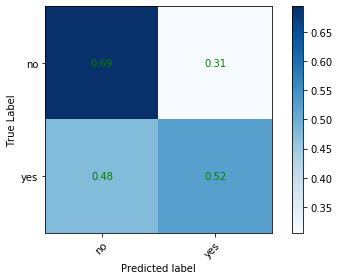

	 Unnormalized Confusion Matrix 


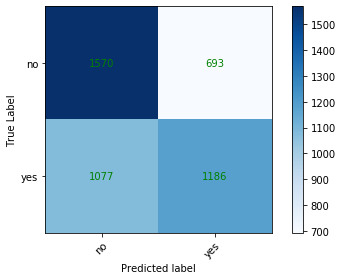

In [18]:
y_test_predicted = linear_svm.predict(X_test)

print ('==> test Linear SVM')
print ('\t\033[94m Report \033[0m')
report(Y_test, y_test_predicted, prefix='\t')
with open('models/svm/linear/report_test_svm.txt', 'w') as f:
    with redirect_stdout(f):          
        report(y_true=Y_test, y_pred=y_test_predicted, prefix='')
        
print ('\n')
print ('\t\033[94m Normalized Confusion Matrix \033[0m')
make_confusion_matrix(y_true=Y_test, 
                      y_pred=y_test_predicted, 
                      names=['no', 'yes'], 
                      normalized=True, 
                      path='models/svm/linear/normalized_cm.png')
print ('\t\033[94m Unnormalized Confusion Matrix \033[0m')
make_confusion_matrix(y_true=Y_test, 
                      y_pred=y_test_predicted, 
                      names=['no', 'yes'], 
                      normalized=False,
                      path='models/svm/linear/unnormalized_cm.png')

# Sigmoid SVM

In [22]:
from sklearn.svm import NuSVC

# nu     = 0.5
# kernel = sigmoid
# gamma  = 1/(n_features*X.var())
# coef0  = 0
# probability = True
# tol    = 1e-7
# verbose     = 0
# random_state= 42
# max_iter    = 1e7
# decision_function_shape = 'ovr'
_sigmoid_svm = NuSVC(nu=0.01,kernel='sigmoid', gamma='scale', probability=True, tol=1e-7, max_iter=1e7, random_state=42)
sigmoid_svm  = None

### training

In [20]:
kfold = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

print ('==> training Sigmoid SVM:')
iteration = 0
best_acc  = 0
for itrain, ivalid in kfold.split(X_train, Y_train):
    print ('\t\033[94m iteration {}\033[0m'.format(iteration))
    
    #split dataset into train and valid, based on folds
    xi_train, xi_valid = X_train[itrain], X_train[ivalid]
    yi_train, yi_valid = Y_train[itrain], Y_train[ivalid]
    print ('\t\t train size: input= {} | output= {}'.format(xi_train.shape, yi_train.shape))
    print ('\t\t valid size: input= {} | output= {}'.format(xi_valid.shape, yi_valid.shape))
        
    #train
    _sigmoid_svm.fit(xi_train, yi_train)
    
    #valid
    y_train_predicted = _sigmoid_svm.predict(xi_train) 
    y_valid_predicted = _sigmoid_svm.predict(xi_valid)
    
    #report
    print ('\t\t report train:')
    report(y_true=yi_train, y_pred=y_train_predicted, prefix='\t\t\t')
    print ('\t\t report valid:')
    acc = report(y_true=yi_valid, y_pred=y_valid_predicted, prefix='\t\t\t')
    
    with open('models/svm/sigmoid/report_train_svm_{}.txt'.format(iteration), 'w') as f:
         with redirect_stdout(f):
                report(y_true=yi_train, y_pred=y_train_predicted, prefix='\t\t\t')
    with open('models/svm/sigmoid/report_valid_svm_{}.txt'.format(iteration), 'w') as f:
         with redirect_stdout(f):          
                report(y_true=yi_valid, y_pred=y_valid_predicted, prefix='\t\t\t')
    
    if acc > best_acc:
        best_acc = acc
        sigmoid_svm = _sigmoid_svm
        
        with open('models/svm/sigmoid/best_svm_model.txt', 'w') as f:
            f.write(str(iteration))
    
    with open('models/svm/sigmoid/svm_{}'.format(iteration), 'wb') as f:
        f.write(pickle.dumps(_sigmoid_svm))
          
    iteration += 1

==> training Sigmoid SVM:
	 iteration 0
		 train size: input= (13576, 103) | output= (13576,)
		 valid size: input= (4526, 103) | output= (4526,)
		 report train:
			 Accuracy :0.4711255156157926
			 AP:       0.48612254009665046
			 F1-score :0.5750976446916795
			 Log-Loss :18.26698682981472
			 Precision:0.48061325420375867
			 Recall   :0.7158220388921627
			 AUC      :0.4711255156157925
		 report valid:
			 Accuracy :0.47613787008395936
			 AP:       0.4884485917937375
			 F1-score :0.5808732543751105
			 Log-Loss :18.093866311850086
			 Precision:0.48408956982911017
			 Recall   :0.726027397260274
			 AUC      :0.47613787008395936
	 iteration 1
		 train size: input= (13576, 103) | output= (13576,)
		 valid size: input= (4526, 103) | output= (4526,)
		 report train:
			 Accuracy :0.4627283441367118
			 AP:       0.48241052459092715
			 F1-score :0.5383544303797468
			 Log-Loss :18.55698588013029
			 Precision:0.47192632046160676
			 Recall   :0.6265468473777254
			 AUC      :0.462

### test

==> test Linear SVM
	 Report 
	 Accuracy :0.4730446310207689
	 AP:       0.48694156015794515
	 F1-score :0.6143896523848019
	 Log-Loss :18.200750881101598
	 Precision:0.4844467108618052
	 Recall   :0.8395934600088378
	 AUC      :0.4730446310207689


	 Normalized Confusion Matrix 


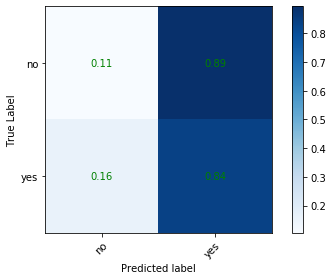

	 Unnormalized Confusion Matrix 


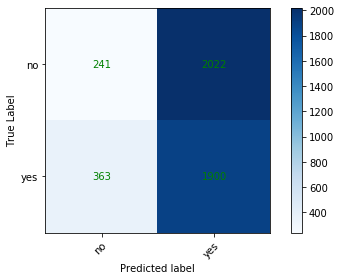

In [21]:
y_test_predicted = sigmoid_svm.predict(X_test)

print ('==> test Linear SVM')
print ('\t\033[94m Report \033[0m')
report(Y_test, y_test_predicted, prefix='\t')
with open('models/svm/sigmoid/report_test_svm.txt', 'w') as f:
    with redirect_stdout(f):          
        report(y_true=Y_test, y_pred=y_test_predicted, prefix='')
        
print ('\n')
print ('\t\033[94m Normalized Confusion Matrix \033[0m')
make_confusion_matrix(y_true=Y_test, 
                      y_pred=y_test_predicted, 
                      names=['no', 'yes'], 
                      normalized=True,
                      path='models/svm/sigmoid/normalized_cm.png')
print ('\t\033[94m Unnormalized Confusion Matrix \033[0m')
make_confusion_matrix(y_true=Y_test, 
                      y_pred=y_test_predicted, 
                      names=['no', 'yes'], 
                      normalized=False,
                      path='models/svm/sigmoid/unnormalized_cm.png')

# Poly SVM

In [ ]:
from sklearn.svm import NuSVC

# nu     = 0.5
# kernel = poly
# degree = 4
# gamma  = 1/(n_features*X.var())
# coef0  = 0
# probability = True
# tol    = 1e-7
# verbose     = 0
# random_state= 42
# max_iter    = 1e7
# decision_function_shape = 'ovr'
_poly_svm = NuSVC(nu=0.1, kernel='poly', degree=4, gamma='scale', probability=True, tol=1e-7, max_iter=1e7, random_state=42)
poly_svm  = None

### training

In [ ]:
kfold = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

print ('==> training Poly SVM:')
iteration = 0
best_acc  = 0
for itrain, ivalid in kfold.split(X_train, Y_train):
    print ('\t\033[94m iteration {}\033[0m'.format(iteration))
    
    #split dataset into train and valid, based on folds
    xi_train, xi_valid = X_train[itrain], X_train[ivalid]
    yi_train, yi_valid = Y_train[itrain], Y_train[ivalid]
    print ('\t\t train size: input= {} | output= {}'.format(xi_train.shape, yi_train.shape))
    print ('\t\t valid size: input= {} | output= {}'.format(xi_valid.shape, yi_valid.shape))
        
    #train
    _poly_svm.fit(xi_train, yi_train)
    
    #valid
    y_train_predicted = _poly_svm.predict(xi_train) 
    y_valid_predicted = _poly_svm.predict(xi_valid)
    
    #report
    print ('\t\t report train:')
    report(y_true=yi_train, y_pred=y_train_predicted, prefix='\t\t\t')
    print ('\t\t report valid:')
    acc = report(y_true=yi_valid, y_pred=y_valid_predicted, prefix='\t\t\t')
    
    with open('models/svm/poly/report_train_svm_{}.txt'.format(iteration), 'w') as f:
         with redirect_stdout(f):
                report(y_true=yi_train, y_pred=y_train_predicted, prefix='\t\t\t')
    with open('models/svm/poly/report_valid_svm_{}.txt'.format(iteration), 'w') as f:
         with redirect_stdout(f):          
                report(y_true=yi_valid, y_pred=y_valid_predicted, prefix='\t\t\t')
    
    if acc > best_acc:
        best_acc = acc
        poly_svm = _poly_svm
        
        with open('models/svm/poly/best_svm_model.txt', 'w') as f:
            f.write(str(iteration))
    
    with open('models/svm/poly/svm_{}'.format(iteration), 'wb') as f:
        f.write(pickle.dumps(_poly_svm))
          
    iteration += 1

### test

In [ ]:
y_test_predicted = poly_svm.predict(X_test)

print ('==> test Poly SVM')
print ('\t\033[94m Report \033[0m')
_ = report(Y_test, y_test_predicted, prefix='\t')
with open('models/svm/poly/report_test_svm.txt', 'w') as f:
    with redirect_stdout(f):          
        report(y_true=Y_test, y_pred=y_test_predicted, prefix='')
print ('\n')
print ('\t\033[94m Normalized Confusion Matrix \033[0m')
make_confusion_matrix(y_true=Y_test, 
                      y_pred=y_test_predicted, 
                      names=['no', 'yes'], 
                      normalized=True,
                      path='models/svm/poly/normalized_cm.png')
print ('\t\033[94m Unnormalized Confusion Matrix \033[0m')
make_confusion_matrix(y_true=Y_test, 
                      y_pred=y_test_predicted, 
                      names=['no', 'yes'], 
                      normalized=False,
                      path='models/svm/poly/unnormalized_cm.png')

# RBF SVM

In [ ]:
from sklearn.svm import NuSVC

# nu     = 0.5
# kernel = rbf
# gamma  = 1/(n_features*X.var())
# probability = True
# tol    = 1e-7
# verbose     = 0
# random_state= 42
# max_iter    = 1e7
# decision_function_shape = 'ovr'
_rbf_svm = NuSVC(kernel='rbf', gamma='scale', probability=True, tol=1e-7, max_iter=1e7, random_state=42)
rbf_svm  = None

### training

In [ ]:
kfold = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

print ('==> training RBF SVM:')
iteration = 0
best_acc  = 0
for itrain, ivalid in kfold.split(X_train, Y_train):
    print ('\t\033[94m iteration {}\033[0m'.format(iteration))
    
    #split dataset into train and valid, based on folds
    xi_train, xi_valid = X_train[itrain], X_train[ivalid]
    yi_train, yi_valid = Y_train[itrain], Y_train[ivalid]
    print ('\t\t train size: input= {} | output= {}'.format(xi_train.shape, yi_train.shape))
    print ('\t\t valid size: input= {} | output= {}'.format(xi_valid.shape, yi_valid.shape))
        
    #train
    _rbf_svm.fit(xi_train, yi_train)
    
    #valid
    y_train_predicted = _rbf_svm.predict(xi_train) 
    y_valid_predicted = _rbf_svm.predict(xi_valid)
    
    #report
    print ('\t\t report train:')
    report(y_true=yi_train, y_pred=y_train_predicted, prefix='\t\t\t')
    print ('\t\t report valid:')
    acc = report(y_true=yi_valid, y_pred=y_valid_predicted, prefix='\t\t\t')
    
    with open('models/svm/rbf/report_train_svm_{}.txt'.format(iteration), 'w') as f:
         with redirect_stdout(f):
                report(y_true=yi_train, y_pred=y_train_predicted, prefix='\t\t\t')
    with open('models/svm/rbf/report_valid_svm_{}.txt'.format(iteration), 'w') as f:
         with redirect_stdout(f):          
                report(y_true=yi_valid, y_pred=y_valid_predicted, prefix='\t\t\t')
    
    if acc > best_acc:
        best_acc = acc
        rbf_svm = _rbf_svm
        
        with open('models/svm/rbf/best_svm_model.txt', 'w') as f:
            f.write(str(iteration))
    
    with open('models/svm/rbf/svm_{}'.format(iteration), 'wb') as f:
        f.write(pickle.dumps(_rbf_svm))
          
    iteration += 1

### test

In [ ]:
y_test_predicted = rbf_svm.predict(X_test)

print ('==> test RBF SVM')
print ('\t\033[94m Report \033[0m')
_ = report(Y_test, y_test_predicted, prefix='\t')
with open('models/svm/rbf/report_test_svm.txt', 'w') as f:
    with redirect_stdout(f):          
        report(y_true=Y_test, y_pred=y_test_predicted, prefix='')
        
print ('\n')
print ('\t\033[94m Normalized Confusion Matrix \033[0m')
make_confusion_matrix(y_true=Y_test, 
                      y_pred=y_test_predicted, 
                      names=['no', 'yes'], 
                      normalized=True,
                      path='models/svm/rbf/normalized_cm.png')
print ('\t\033[94m Unnormalized Confusion Matrix \033[0m')
make_confusion_matrix(y_true=Y_test, 
                      y_pred=y_test_predicted, 
                      names=['no', 'yes'], 
                      normalized=False,
                      path='models/svm/rbf/unnormalized_cm.png')